In [8]:
from xrr import XRR
from xrr_toolkit import file_dialog
from xrr_sorter import xrr_sorter
import ipywidgets as widgets
import warnings

warnings.filterwarnings("ignore")

In [9]:
dir = file_dialog()

In [10]:
xrr_sorter(dir)

  0%|          | 0/155 [00:00<?, ?it/s]

In [11]:
dir = file_dialog()
xrr1 = XRR(dir, height=25)

IndexError: list index out of range

In [4]:
%matplotlib inline
@widgets.interact(point = (0, xrr1.refl.q.size-1))
def spot_checker(point = 0): xrr1.check_spot(point)

interactive(children=(IntSlider(value=0, description='point', max=228), Output()), _dom_classes=('widget-inter…

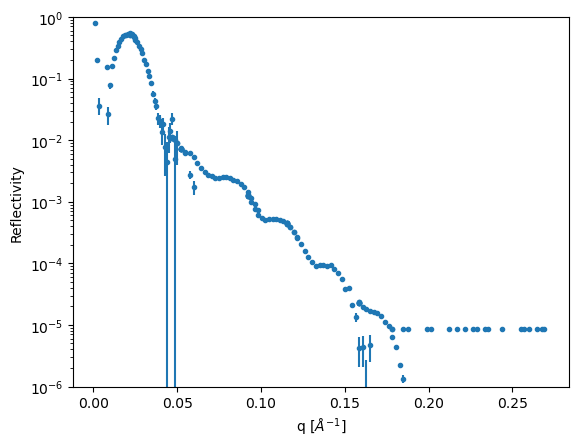

In [3]:
xrr1.refl.plot(ylims=(1e-6, 1))

In [6]:
xrr1.images.generate_mask(7)
xrr1.apply_mask()

This allows us to see the raw data, and how the algorithm subtracts out data. 

# Multi Loader

In [137]:
dir = file_dialog()
assert dir.name == "CCD"

In [144]:
xrr_sorter(dir)
multi_dir = dir.parent / '/Sorted'

The sorted directory already exists - Checking for energy sub-directories


  0%|          | 0/337 [00:00<?, ?it/s]

In [145]:
multi_dir = dir.parent.joinpath('Sorted')

In [146]:
import os
import pathlib

xrr_data = {}
Energies = list(multi_dir.iterdir())
Energies

[WindowsPath('C:/Users/Harlan Heilman/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents (1)/Synchrotron Logistics and Data/ALS - Berkeley/Data/BL1101/2023May/XRR/05-11-23/Data/CCD Scan 80884/Sorted/284.2'),
 WindowsPath('C:/Users/Harlan Heilman/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents (1)/Synchrotron Logistics and Data/ALS - Berkeley/Data/BL1101/2023May/XRR/05-11-23/Data/CCD Scan 80884/Sorted/285.1'),
 WindowsPath('C:/Users/Harlan Heilman/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents (1)/Synchrotron Logistics and Data/ALS - Berkeley/Data/BL1101/2023May/XRR/05-11-23/Data/CCD Scan 80884/Sorted/287.0'),
 WindowsPath('C:/Users/Harlan Heilman/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents (1)/Synchrotron Logistics and Data/ALS - Berkeley/Data/BL1101/2023May/XRR/05-11-23/Data/CCD Scan 80884/Sorted/289.0')]

In [147]:
from tqdm.auto import tqdm

for energy in tqdm(Energies):
    xrr_data[f"{energy.name}"] = XRR(energy)

  0%|          | 0/4 [00:00<?, ?it/s]

In [148]:
@widgets.interact(energy=[E.name for E in Energies])
def show_plots(energy):
    xrr = xrr_data[f"{energy}"]

    @widgets.interact(point=(0, xrr.refl.q.size - 1))
    def spot_checker(point=0):
        xrr.check_spot(point)

interactive(children=(Dropdown(description='energy', options=('284.2', '285.1', '287.0', '289.0'), value='284.…

In [ ]:
xrr_data[0].refl.